In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the engineered dataset
df= pd.read_csv("C:/Users/USER/My notebook/DataSciencePro/loan-default-analysis/data/engineered_dataset/featured_data.csv")
print(df.shape)
df.info()

(27346, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27346 entries, 0 to 27345
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 27346 non-null  object 
 1   birthdate                  27346 non-null  object 
 2   bank_account_type          27346 non-null  object 
 3   longitude_gps              27346 non-null  float64
 4   latitude_gps               27346 non-null  float64
 5   bank_name_clients          27346 non-null  object 
 6   employment_status_clients  27346 non-null  object 
 7   systemloanid               27346 non-null  float64
 8   loannumber                 27346 non-null  float64
 9   loanamount                 27346 non-null  float64
 10  totaldue                   27346 non-null  float64
 11  termdays                   27346 non-null  float64
 12  approveddate               27346 non-null  object 
 13  creationdate               27346 n

In [ ]:
# Define Target and feature
X = df[["loanamount"]]
y = df["totaldue"] 

In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (21876, 1)
Testing features shape: (5470, 1)


In [11]:
# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Print model coefficients and evaluation metrics
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Slope: 1.1154705434026642
Intercept: 1164.1295601973834
R^2 Score: 0.9904581769950492
Mean Squared Error: 1059126.7590334222


In [18]:
print(f"RMSE: {np.sqrt(1059126.7590334222)}")
print(f"Target range: {y_test.min()} to {y_test.max()}")

RMSE: 1029.138843418818
Target range: 4600.0 to 57500.0


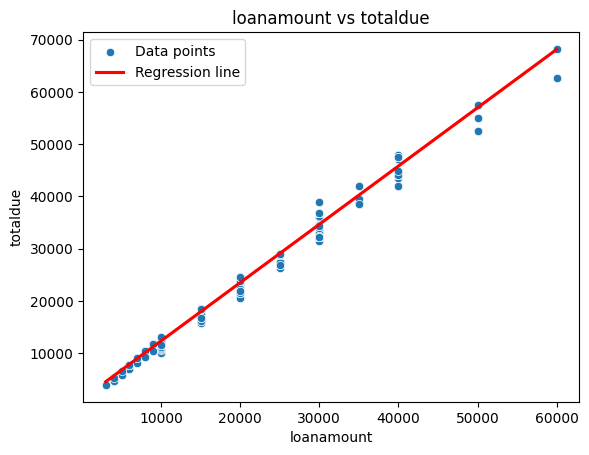

In [26]:
sns.scatterplot(data=df, x='loanamount', y='totaldue', label='Data points')
sns.regplot(data=df, x='loanamount', y='totaldue', scatter=False, color='red', label='Regression line')
plt.title("loanamount vs totaldue")
plt.legend()
plt.show()

# This linear regression model shows excellent performance with an R² score of 0.99, meaning it explains 99% of the variation in total due amounts.
# The slope of 1.12 indicates that for every dollar increase in loan amount, the total due increases by approximately $1.12 following the general:
#                               y = mx + b
# - this makes business sense as it reflects the principal plus interest and fees. The intercept of $1,164 represents the base fees or charges applied regardless of loan size.
# The near-perfect correlation suggests a very predictable relationship between loan amounts and what customers ultimately owe, which is expected in a well-structured lending system with consistent fee structures.

In [44]:
# Save the model 
joblib.dump(model, "linear_regression_model2.pkl")

['linear_regression_model2.pkl']

In [45]:
# Make prediction to authenticate the loaded model 
single_value = np.array([[200]])
predicted_value = model.predict(single_value)
print(f"Predicted value for input {single_value[0][0]}: {predicted_value[0]}")

Predicted value for input 200: 1387.2236688779162


c:\Users\USER\anaconda3\envs\olayinka\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
